# Predicting Chronic Kidney Disease based on health records
Given 24 health related attributes taken in 2-month period of 400 patients, using the information of the 158 patients with complete records to predict the outcome (i.e. whether one has chronic kidney disease) of the remaining 242 patients (with missing values in their records).


## Load Modules and helper functions

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import os, sys
import lux
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head(n=10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [3]:
df.shape

(400, 26)

In [4]:
#find null Values in the data set

df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
# Impuing Null values

from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed=pd.DataFrame(imp_mode.fit_transform(df))
df_imputed.columns=df.columns
df_imputed

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [6]:

df_imputed.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

In [8]:
print(df_imputed["rc"].mode())
print(df_imputed["wc"].mode())
print(df_imputed["pcv"].mode())

0    5.2
dtype: object
0    9800
dtype: object
0    41
dtype: object


In [9]:
df_imputed["classification"]=df_imputed["classification"].apply(lambda x:'ckd' if x=="ckd\t"  else x)

df_imputed["cad"]=df_imputed["cad"].apply(lambda x:'no' if x=="\tno"  else x)

df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'no' if x=="\tno"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x=="\tyes"  else x)
df_imputed["dm"]=df_imputed["dm"].apply(lambda x:'yes' if x==' yes'  else x)

df_imputed["rc"]=df_imputed["rc"].apply(lambda x:'5.2' if x=='\t?'  else x)

df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t6200'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x=='\t8400'  else x)
df_imputed["wc"]=df_imputed["wc"].apply(lambda x:'9800' if x== '\t?'  else x)

df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x=='\t43'  else x)
df_imputed["pcv"]=df_imputed["pcv"].apply(lambda x:'41' if x== '\t?'  else x)






In [10]:
# Finding Unique values in the columns

for i in df_imputed.columns:
    print("*************************************************",i,"************************************************************")
    print()
    print(set(df_imputed[i].tolist()))
    print()

************************************************* id ************************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,

AxesSubplot(0.125,0.125;0.775x0.755)


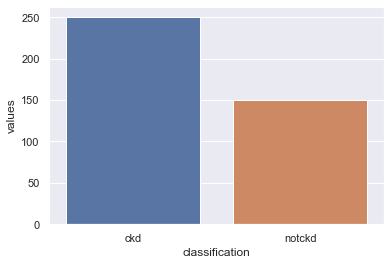

In [11]:
#Check Label Imbalance

import matplotlib.pyplot as plt
import seaborn as sns

temp=df_imputed["classification"].value_counts()
temp_df= pd.DataFrame({'classification': temp.index,'values': temp.values})
print(sns.barplot(x = 'classification', y="values", data=temp_df))

In [12]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [13]:
# fixing data types

df_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object


In [14]:
for i in df.select_dtypes(exclude=["object"]).columns:
    df_imputed[i]=df_imputed[i].apply(lambda x: float(x))

In [15]:
df_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


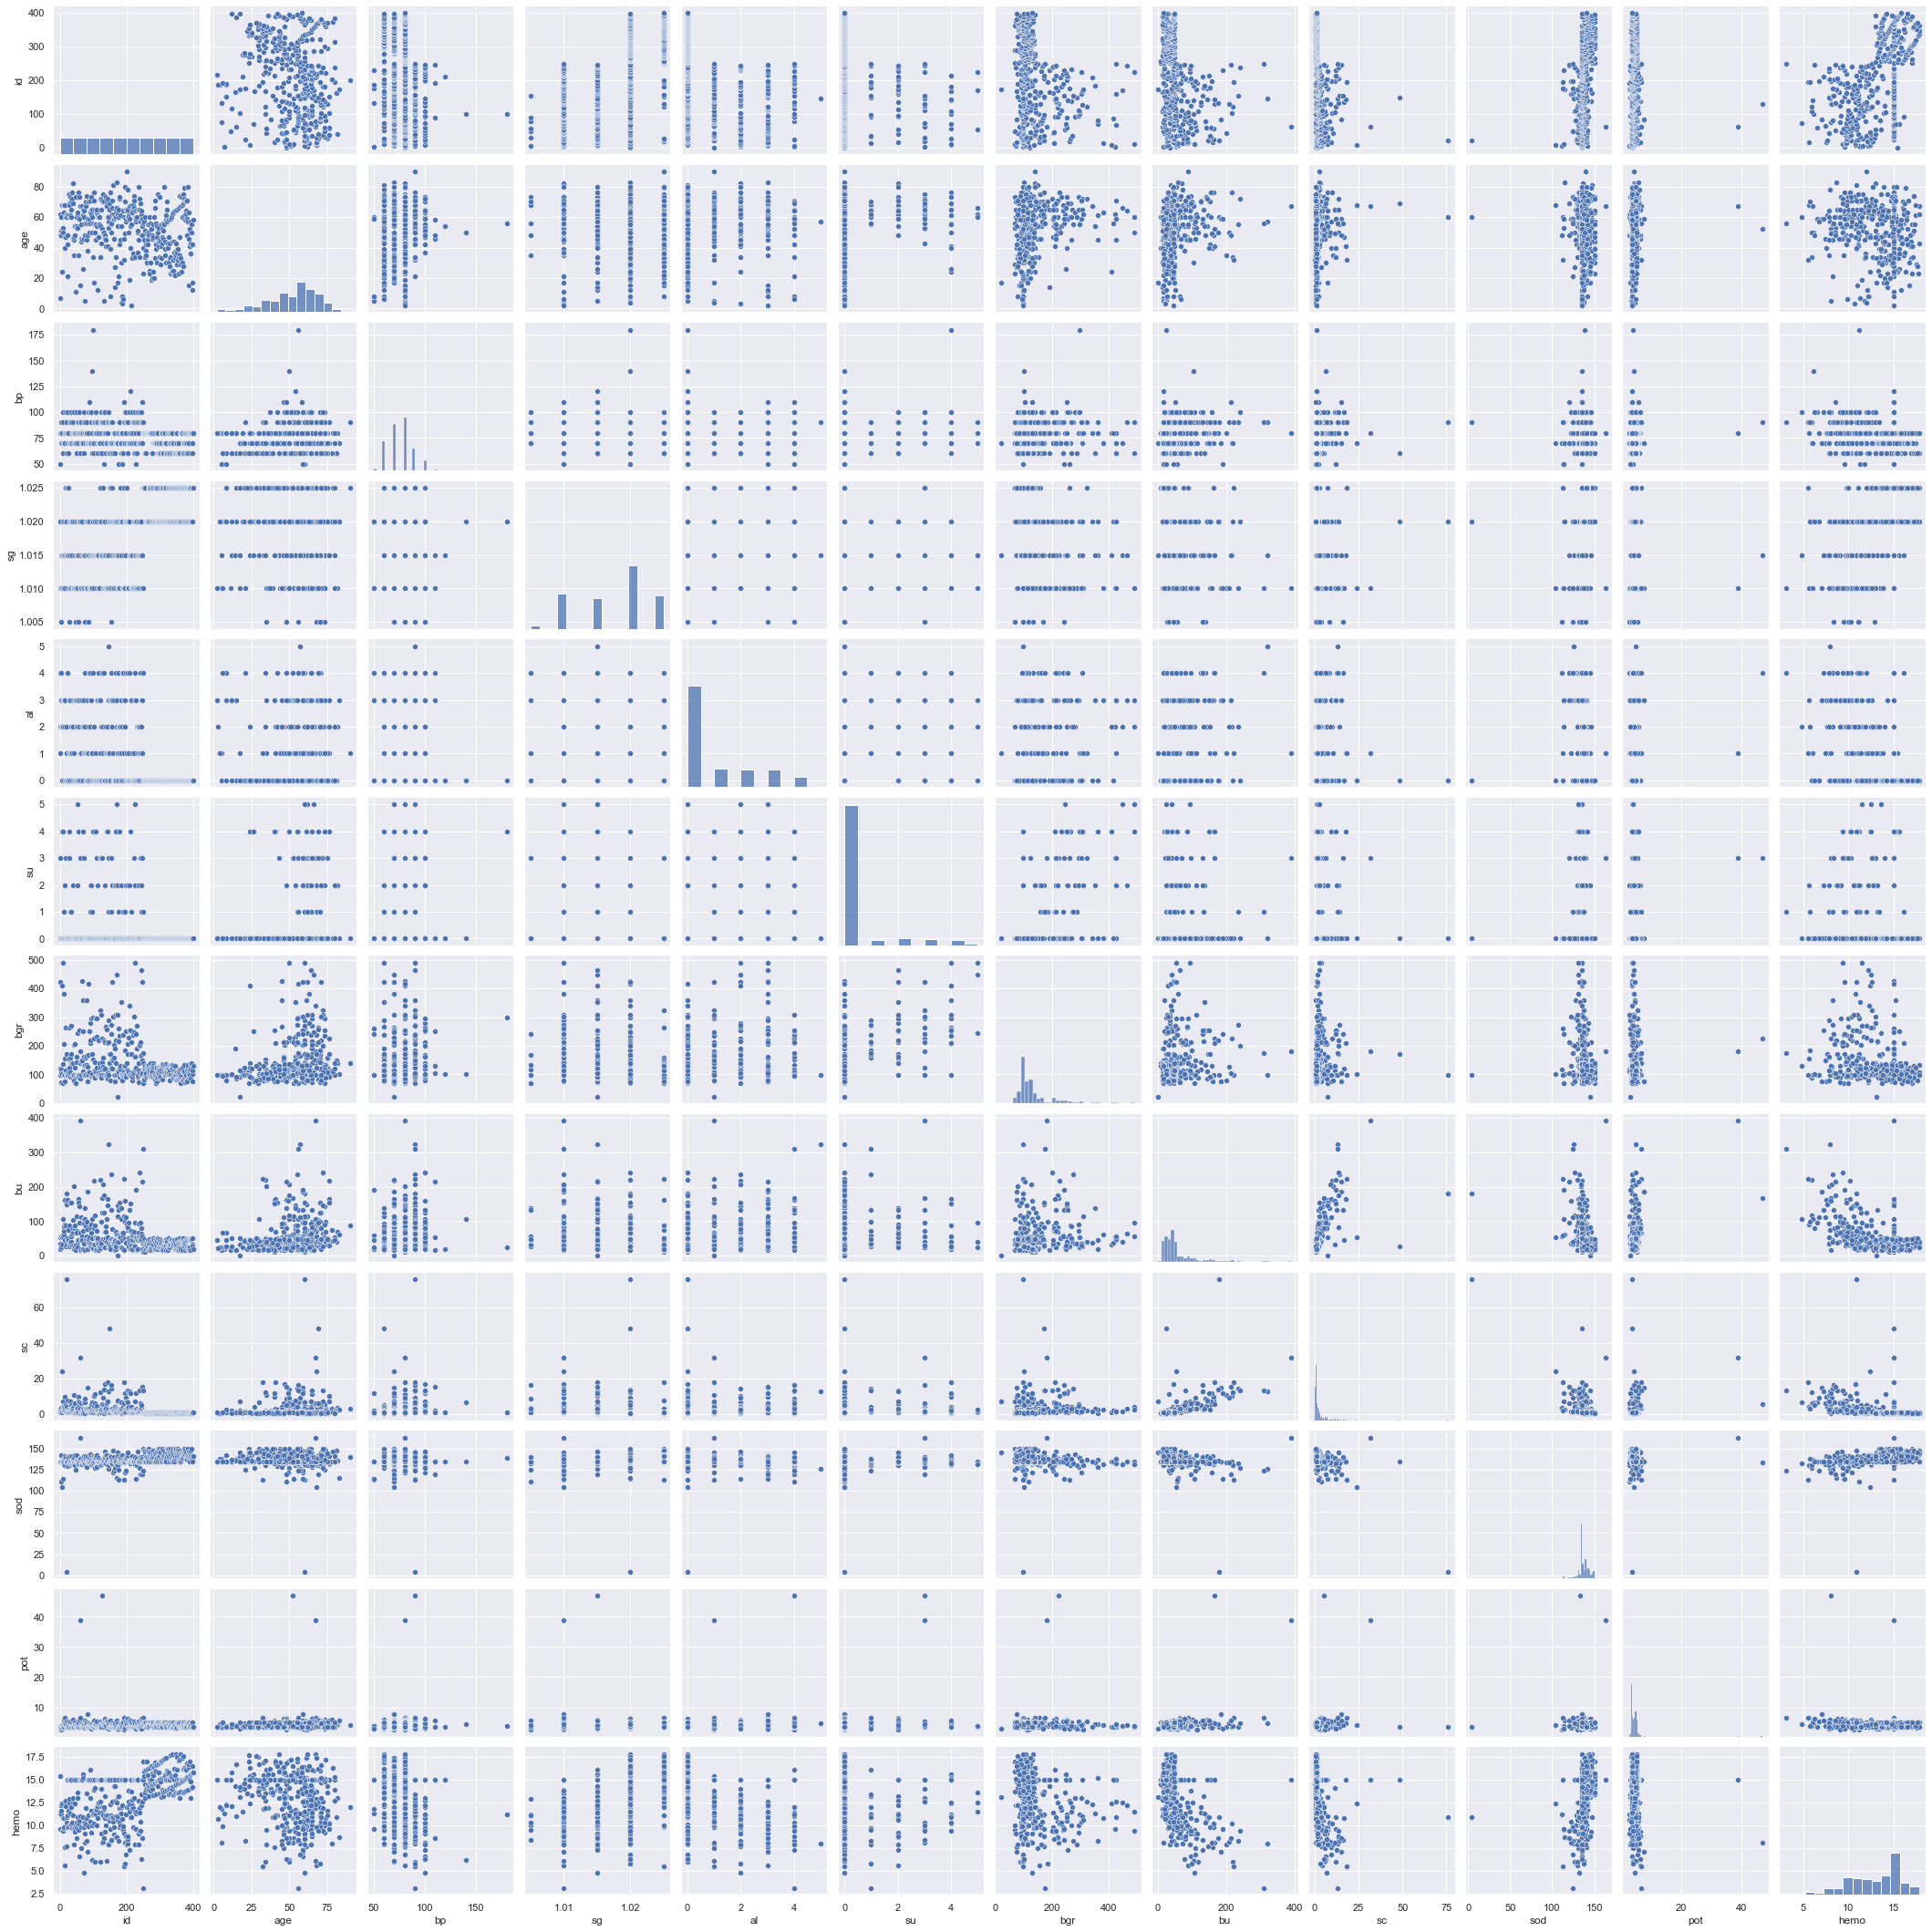

In [16]:
sns.pairplot(df_imputed)

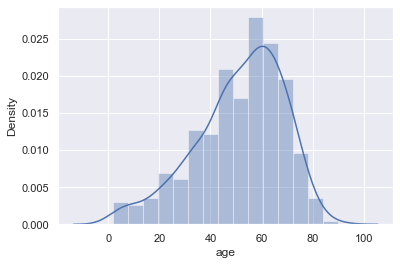

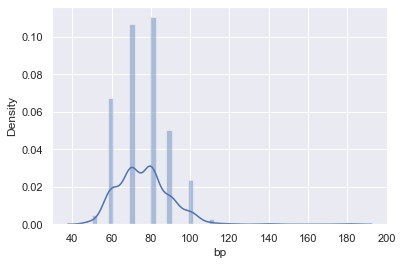

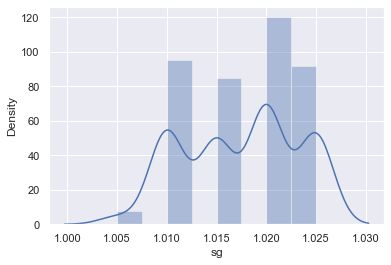

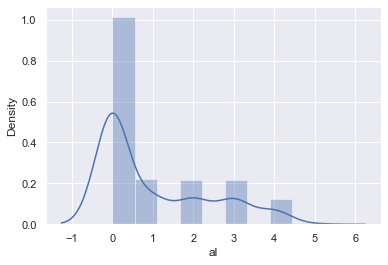

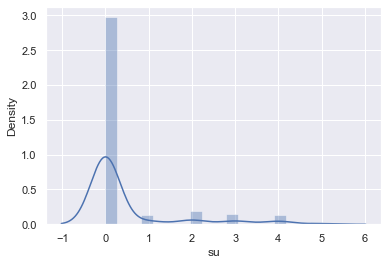

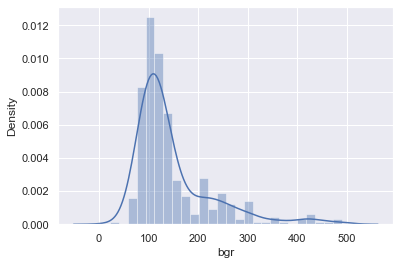

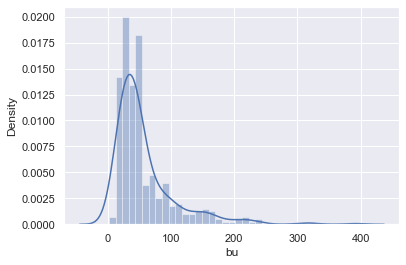

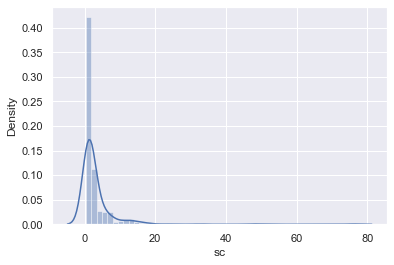

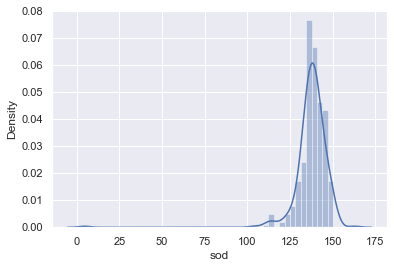

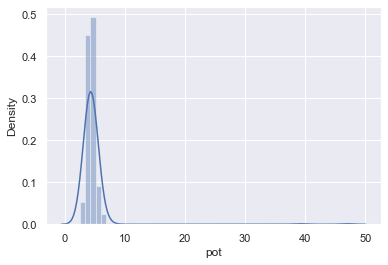

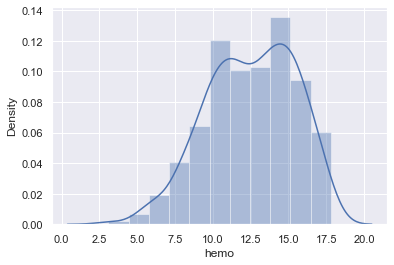

In [17]:
# Find the distribution of data

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

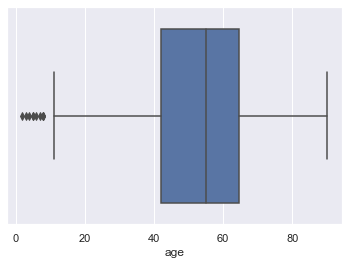

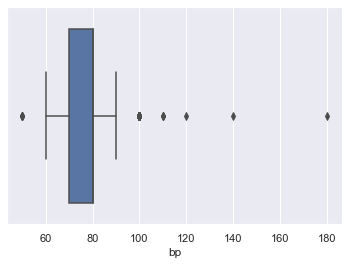

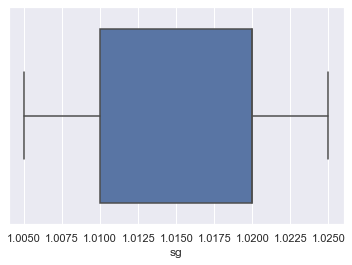

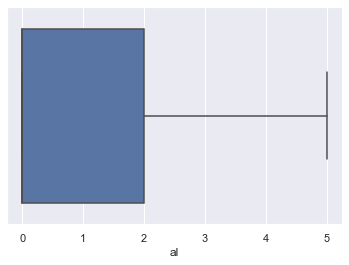

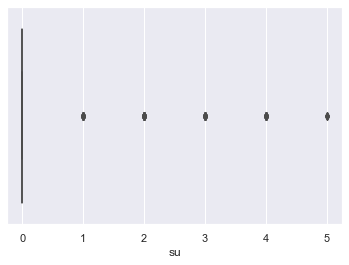

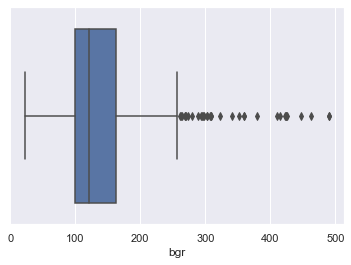

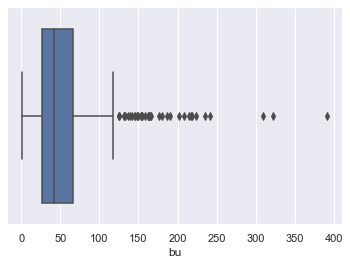

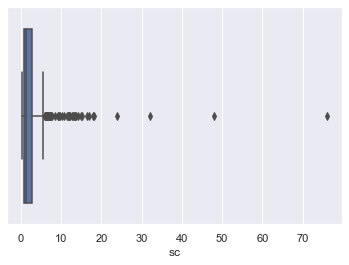

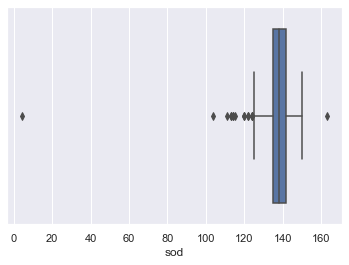

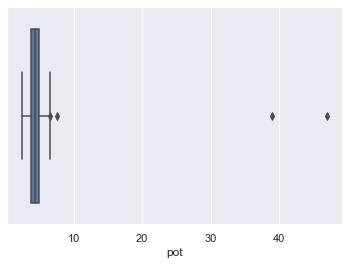

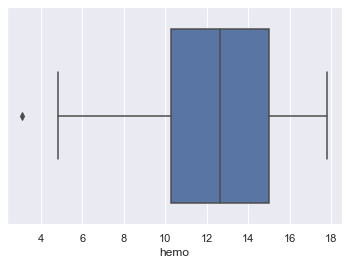

In [18]:
# Find and remove outliers of data

def boxplots(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [19]:
# Label encoding to convert categorical values to numerical
from sklearn import preprocessing

df_enco=df_imputed.apply(preprocessing.LabelEncoder().fit_transform)
df_enco

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
df_enco.to_csv("Kidney_Disease_Pre-Processed.csv")

<AxesSubplot:>

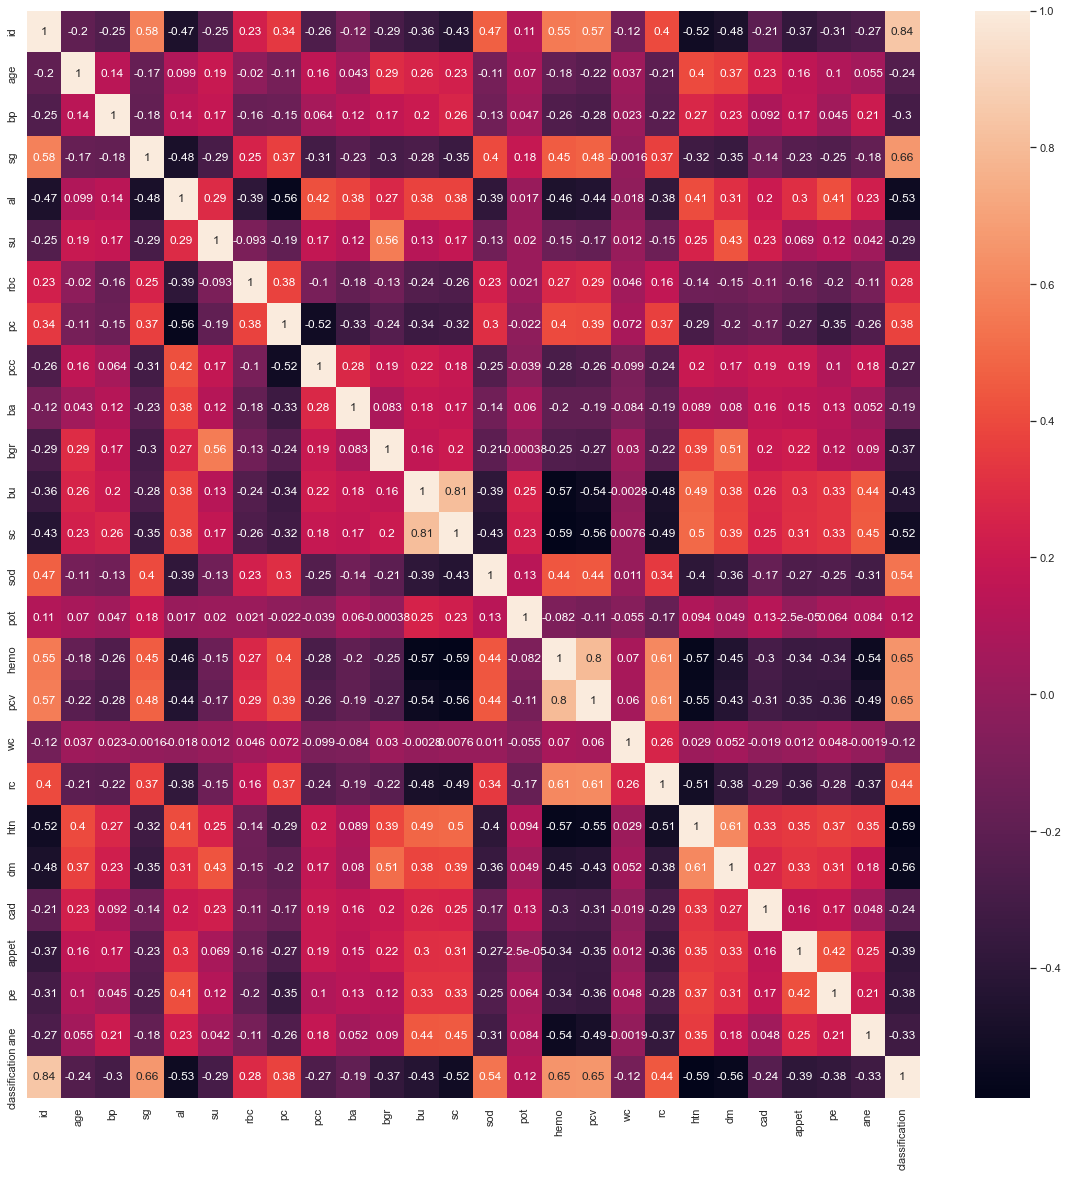

In [21]:
# Finding Correlations

plt.figure(figsize=(20,20))
corr=df_enco.corr()
sns.heatmap(corr,annot=True)

In [22]:
# Making some final changes to the data 

# Seperate independent and dependent variables and drop the ID column
x=df_enco.drop(["id","classification"],axis=1)
y=df_enco["classification"]

In [23]:
# Detecting the label balance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [24]:
# Balancing the labels

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(x, y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [25]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them. 

scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(X_ros)
y=y_ros

In [26]:
# Applying PCA 
# Scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca = PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

# We need 18 columns to keep 95% of the variance

(500, 24)
(500, 18)


In [27]:
# With PCA

#Now,split the dataset into training and testing sets keeping 20% of the data for testing.
#Split the dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [30]:
import keras

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model

from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold


In [31]:
# Creating the model

def model():
    
    classifier = Sequential()
    classifier.add(Dense(15, input_shape = (x_train.shape[1],), activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15, activation = 'relu')) # The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1, activation = 'sigmoid')) # The main reason why we use sigmoid function is because it exists between (0 to 1).
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [32]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 5,verbose = 1)                  
                      

Epoch 1/5
13/13 [==============================] - 3s 47ms/step - loss: 0.7292 - accuracy: 0.4975 - val_loss: 0.6824 - val_accuracy: 0.6800
Epoch 2/5
13/13 [==============================] - 0s 9ms/step - loss: 0.6759 - accuracy: 0.5700 - val_loss: 0.6528 - val_accuracy: 0.7300
Epoch 3/5
13/13 [==============================] - 0s 8ms/step - loss: 0.6726 - accuracy: 0.6125 - val_loss: 0.6248 - val_accuracy: 0.7800
Epoch 4/5
13/13 [==============================] - 0s 8ms/step - loss: 0.6437 - accuracy: 0.6325 - val_loss: 0.5975 - val_accuracy: 0.8400
Epoch 5/5
13/13 [==============================] - 0s 8ms/step - loss: 0.6182 - accuracy: 0.6375 - val_loss: 0.5701 - val_accuracy: 0.8800


In [34]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score, plot_precision_recall_curve, f1_score, confusion_matrix


# function to plot the roc_curve
def plot_auc(t_y, p_y):
    fpr, tpr, thresholds = roc_curve(t_y, p_y, pos_label=1)
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('classification', auc(fpr, tpr)))
    c_ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve_helper(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y, pos_label=1)
    aps = average_precision_score(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('classification', aps))
    c_ax.plot(recall, precision, color='red', lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    

# function to plot the history
def plot_history(history):
    f = plt.figure()
    f.set_figwidth(15)
    
    f.add_subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label='val loss')
    plt.plot(history.history['loss'], label='train loss')
    plt.legend()
    plt.title("Modell Loss")
    
    f.add_subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.legend()
    plt.title("Modell Accuracy")

    plt.show()

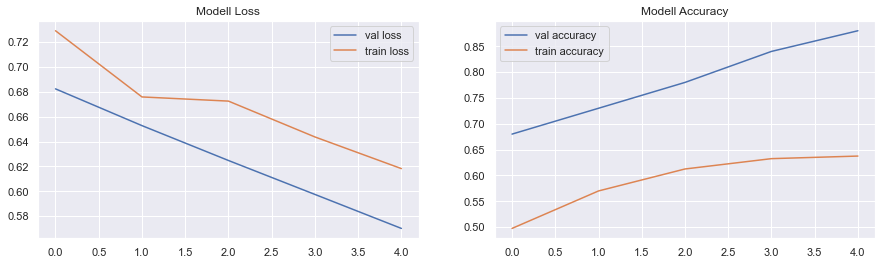

In [35]:
hist = plot_history(history)

4/4 [==============================] - 0s 3ms/step


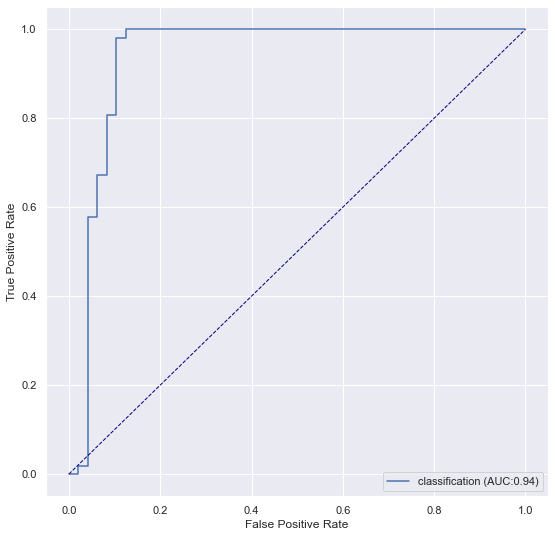

In [36]:
plot_auc(y_test, model.predict(x_test, verbose = True))

4/4 [==============================] - 0s 3ms/step


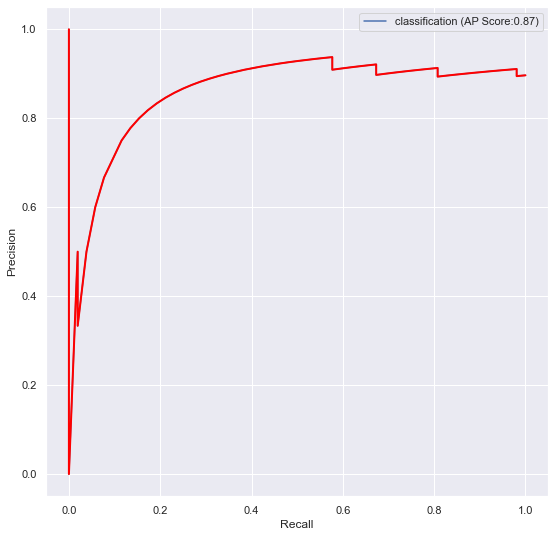

In [37]:
plot_precision_recall_curve_helper(y_test, model.predict(x_test, verbose = True))

In [38]:
## Find the threshold that optimize your model's performance,
## and use that threshold to make binary classification.Take all your metrics into consideration.

def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision, recall, thresholds = precision_recall_curve(y_test, model.predict(x_test, verbose = True))
f1score = [calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
idx = np.argmax(f1score)
threshold = thresholds[idx]
print('********************************************************************************************************')
print('Precision: '+ str(precision[idx]))
print('Recall: '+ str(recall[idx]))
print('Threshold: '+ str(thresholds[idx]))
print('F1 Score: ' + str(f1score[idx]))

4/4 [==============================] - 0s 3ms/step
********************************************************************************************************
Precision: 0.896551724137931
Recall: 1.0
Threshold: 0.53762645
F1 Score: 0.9454545454545454


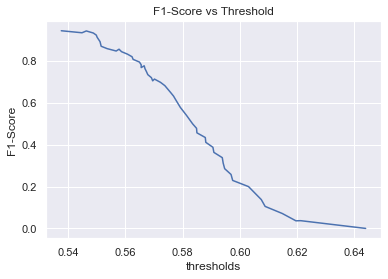

In [39]:
# The Threshold or Cut-off represents in a binary classification the probability that the prediction is true. It represents the tradeoff between false positives and false negatives.
plt.figure()
plt.plot(thresholds, f1score)
plt.title("F1-Score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1-Score")
plt.show()